# House Prices
## 2. House Prices EDA
[캐글]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques <br>
[참고 커널모음] :https://subinium.github.io/kaggle-tutorial/house-prices <br>

#### Python Tutorials
아래 튜토리얼 하나씩 필사할 예정

> * Comprehensive Data Exploration with Python (필사 시작일 : 2020-09-01)
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

> * House Prices EDA (필사 시작일 : 2020-09-04)
https://www.kaggle.com/dgawlik/house-prices-eda

> * A Study on Regression Applied to the Ames Dataset
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

> * Regularized Linear Models
https://www.kaggle.com/apapiu/regularized-linear-models



--------------------------------------------------------------------------------------------------
## What I learned (분석내용 정리)
* Categorical data 
> * 질적 변수의 경우 object 형태를 categorical로 바꾼다.
> * ANOVA분석으로 독립변수가 종속변수에 얼마나 영향을 미치는지를 체크.
    * ANOVA결과에 log변환을 해서 시각화
    * (Q) : box-plot을 그렸을때와 ANOVA분석을 했을때 종속변수에 영향을 미치는 정도의 순위가 다르게 나온다면 ?
> * 질적변수안에 카테고리들을 1,2,3,4,5처럼 숫자로 encoding하는 작업.
    * 딕셔너리활용

* Correlation
> * 스피어만 상관관계
    * 이 경우 두 변수가 순위척도 자료이여서 피어슨이 아닌 스피어만 상관관계를 사용
> * 히트맵
    * 1. 질적변수와 종속변수간의 상관관계
    * 2. 양적변수와 종속변수간의 상관관계
    * 3. 두 종류의 독립변수(질적변수와 양적변수) 간의 상관관계
    
* Pair-plot
> * 독립변수와 종속변수간에 선형관계인지, 비선형관계인지를 알 수 있음.
> * 여러 컬럼별 그래프 한꺼번에 그리는 방법
    * sns.FacetGrid () , map() 사용
    
* Price Segments (종속변수 세그먼트)
> * 집값이 낮은그룹인지, 높은그룹인지에 따라서 독립변수와의 관계가 다르게 나타날 수 있으므로, 종속변수를 그룹으로 나누어서 독립변수와의 관계를 살펴보는 방법도 있음.
--------------------------------------------------------------------------------------------------




## 캐글하면서 얻게되는 것
1. 필사하면서 전반적인 EDA과정을  익힐 수 있다.
    * 결측치처리, 변수별 분포 확인, 독립변수와 종속변수 또는 독립변수간의 상관관계 등
2. 커널별로 코딩방식이 조금씩 달라서 유용한 코딩방법을 익힐 수 있다.
    * (+) 몰랐던 python 함수들도 익힐 수 있음.
3. 들어만 보고 제대로 몰랐던 알고리즘이나, 통계분석 방법을 다시 짚고넘어갈 수 있다.
    * 커널에 통계분석 내용이 나오면 나온김에 다시 이론을 정리하고 넘어감. (알고리즘도 마찬가지)
4. 영어로 되어있어서 이를 번역해보면서 영어실력도 덤으로 키울 수 있음..
    * 공부를 하다보면 대부분 영어로 되어있는 자료들이 많아서 영어를 잘하진 않아도 적어도 영어에 '익숙'해질 필요가 있음

In [36]:
conda install -c conda-forge xgboost

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::astropy==4.0=py36h1de35cc_0
  - defaults/osx-64::imageio==2.6.1=py36_0
  - defaults/osx-64::datashape==0.5.4=py36_1
  - defaults/osx-64::scipy==1.4.1=py36h9fa6033_0
  - defaults/osx-64::pandas==1.0.0=py36h6c726b0_0
  - defaults/osx-64::_anaconda_depends==2019.03=py36_0
  - defaults/osx-64::blaze==0.11.3=py36_0
  - defaults/osx-64::patsy==0.5.1=py36_0
  - defaults/osx-64::numexpr==2.7.1=py36hce01a72_0
  - defaults/osx-64::numpy-base==1.18.1=py36h6575580_1
  - defaults/osx-64::pywavelets==1.1.1=py36h1de35cc_0
  - defaults/noarch::pytest-doctestplus==0.5.0=py_0
  - defaults/noarch::pytest-astropy==0.7.0=py_0
  - defaults/osx-64::anaconda==custom=py36_1
  - defaults/osx-64::h5py==2.8.0=py36h878fce3_3
  - defaults/osx-64::pytest-arraydiff==0.3=py36h39e3cac_0
  - defaults/osx-64::odo==0.5.1=py36hc1af34a_0
  - defaults/osx

        last_spec = MatchSpec.union((path[-1], target_paths[-1][-1]))[0]
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 481, in union
        return cls.merge(match_specs, union=True)
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 475, in merge
        reduce(lambda x, y: x._merge(y, union), group) if len(group) > 1 else group[0]
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 475, in <lambda>
        reduce(lambda x, y: x._merge(y, union), group) if len(group) > 1 else group[0]
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 502, in _merge
        final = this_component.union(that_component)
      File "/Users/suhyun/anaconda3/lib/python3.6/site-packages/conda/models/match_spec.py", line 764, in union
        return '|'.join(options)
    TypeError: sequence item 0: expected str instance

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
pd.options.display.max_rows=1000
pd.options.display.max_columns=20

train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

# 정량적 변수
quantitative=[f for f in train.columns if train.dtypes[f]!='object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
# 정성적 변수
qualitative=[f for f in train.columns if train.dtypes[f]=='object']

In [3]:
train.shape

(1460, 81)

In [4]:
len(quantitative)

36

In [6]:
len(qualitative)

43

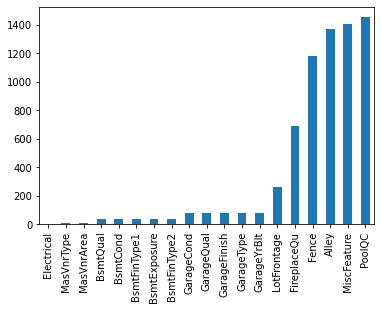

In [4]:
missing=train.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar();

* 19개의 변수에서 결측치가 나타났다. 그중 5개는 50%이상이 결측치.

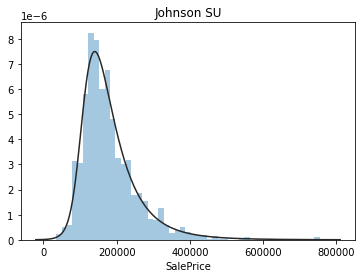

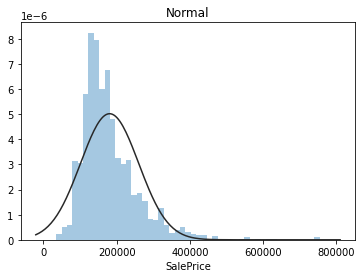

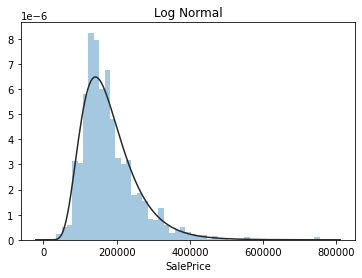

In [14]:
import scipy.stats as st
y=train['SalePrice']
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu);
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm);
plt.figure(3); plt.title('Log Normal')
sns.distplot(y,kde=False, fit=st.lognorm)

* SalePrice는 정규분포를 따르지 않는다. 로그변환이 효과가 있어보임.

In [33]:
# shapiro테스트를 위해 결측치는0으로채워준것. 
## p-value가 0.01보다 작으면 정규분포를 따르지 않는다. 

test_normality=lambda x: stats.shapiro(x.fillna(0))[1] <0.01   # True,False값 반환.
normal=pd.DataFrame(train[quantitative])
normal=normal.apply(test_normality)
print(not normal.any())

False


* quantitive(정량적) 변수들중에 정규분포를 따르는것이 하나도없으므로, 이또한transform이 필요.

In [14]:
pd.melt(train, value_vars=quantitative)

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
...,...,...
52555,YrSold,2007.0
52556,YrSold,2010.0
52557,YrSold,2010.0
52558,YrSold,2010.0


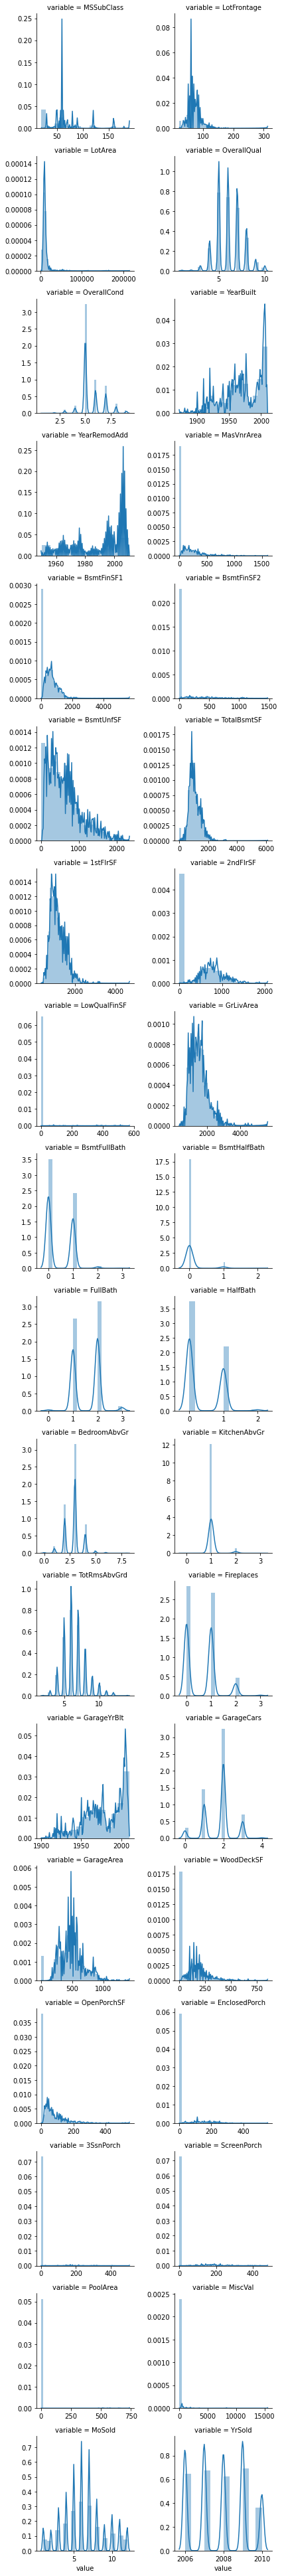

In [28]:
f = pd.melt(train, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",kde_kws={'bw':0.1})

몇몇 독립변수들은 로그변환이 필요해보인다. TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea <br>
불규칙한 양상의 변수들은 feature construnction의 후보일 수 있다.

------------------------------------------------------------------------------------
# Categorical data
질적 변수들로는 두가지를 시행해볼 수 있다. <br>
* 하나는, 각 변수값에 대해 SalePrice의 분포를 체크하는 것이고
* 다른 하나는, 각 카테고리 별로 더미변수를 생성하는 것이다.

In [71]:
train['BsmtQual']=train['BsmtQual'].astype('category')

In [72]:
# dtype:object -> dtype:category로 변경.
train['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: category
Categories (4, object): [Ex, Fa, Gd, TA]

In [79]:
train['BsmtQual']=train['BsmtQual'].cat.add_categories(['MISSING'])

In [80]:
# category에 MISSING추가됨.
train['BsmtQual']

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: category
Categories (5, object): [Ex, Fa, Gd, TA, MISSING]

**qualitative변수들을 category형태로 바꾸고, MISSING카테고리 추가하여 결측치를 MISSING으로 채운다**

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


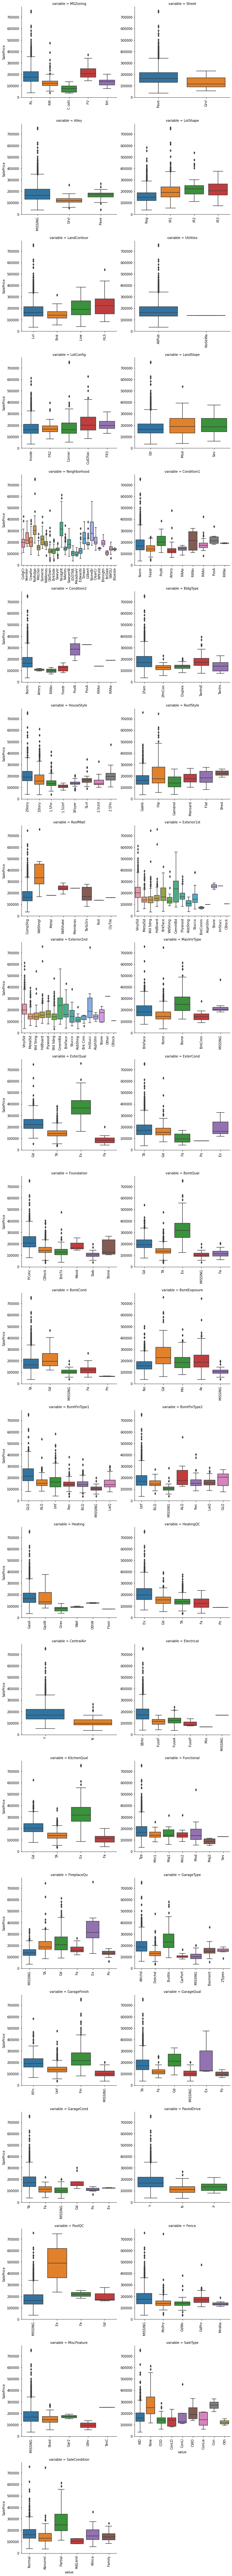

In [102]:
# 카테고리 변수의 결측치 채우기
for c in qualitative:
    train[c] = train[c].astype('category')   # object타입을 category타입으로 변경.
    if train[c].isnull().any():   # 결측이 하나라도 있으면
        train[c]=train[c].cat.add_categories(['MISSING'])    # MISSING이라는 카테고리를 추가
        train[c]=train[c].fillna('MISSING')   # 결측치에 MISSING값 대체
        
# 시각화
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
f=pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
g=sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False,size=5)
g=g.map(boxplot,"value","SalePrice")

몇몇 카테고리는 SalePrice에 대하여 굉장히 다양하다. Neighborhood는 집값에 큰 영향을 준다.<br>
Pool이 있는것이 가격 상승에 요인이되는것으로 보임. 또한 카테고리 변수 사이에 산포도에도 차이가 있다.

In [93]:
# melt로 변수들을 행값으로 내려줌.
f=pd.melt(train, id_vars=['SalePrice'], value_vars=qualitative)
f

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
...,...,...,...
62775,175000,SaleCondition,Normal
62776,210000,SaleCondition,Normal
62777,266500,SaleCondition,Normal
62778,142125,SaleCondition,Normal


In [100]:
# 결측치가 MISSING으로 채워짐.
f.query('value=="MISSING"')

,SalePrice,variable,value
2920,208500,Alley,MISSING
2921,181500,Alley,MISSING
2922,223500,Alley,MISSING
2923,140000,Alley,MISSING
2924,250000,Alley,MISSING
...,...,...,...
59854,185000,MiscFeature,MISSING
59855,175000,MiscFeature,MISSING
59856,210000,MiscFeature,MISSING
59858,142125,MiscFeature,MISSING


#### ANOVA분석으로 종속변수에 영향을 미치는 변수 판별
* 각 정성적 변수에서 카테고리(그룹)별 SalesPrice의 평균값에 차이가있는지를 ANOVA로 검정.
* 컬럼안에 카테고리에 따라 SalesPrice가 다르다면, 해당 변수는 SalePrice에 영향을 미친다고 볼수있다.

SalePrice에 영향을 미치는 categorical 변수를 추정한것이다.<br>
category변수를 기반으로 SalePrices가 분명한 셋으로 나누어졌다. <br>
set이 비슷한 분포를 갖고있는지 ANOVA테스트로  확인한다.<br>
만약 변수 영향력이 적다면, set의 평균은 동일해야한다.<br>
p-value의 하강은 parition에서 다양성이 상승한다는 것을 의미한다.<br>
  > p-value가 작을수록 독립변수가 종속변수에 미치는 영향이 큰것으로 해석해도되나..

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


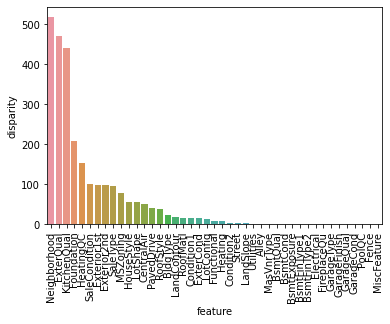

In [43]:
def anova(frame):
    anv=pd.DataFrame()
    anv['feature']=qualitative
    pvals=[]
    for c in qualitative:   # c=정성적 변수에 대한 컬럼명
        samples=[]
        for cls in frame[c].unique(): # cls= 정석적 변수 컬럼안에 유니크한 값들.
            s=frame[frame[c]==cls]['SalePrice'].values  # s=해당 컬럼에 특정값일때의 SalePrice값.
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a=anova(train)
a['disparity']=np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature',y='disparity')
x=plt.xticks(rotation=90)

In [39]:
train['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [28]:
train[train['SaleType']=='WD']['SalePrice'].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [23]:
for c in qualitative:
    samples=[]
    for cls in train[c].unique():
        print(cls)

RL
RM
C (all)
FV
RH
Pave
Grvl
nan
Grvl
Pave
Reg
IR1
IR2
IR3
Lvl
Bnk
Low
HLS
AllPub
NoSeWa
Inside
FR2
Corner
CulDSac
FR3
Gtl
Mod
Sev
CollgCr
Veenker
Crawfor
NoRidge
Mitchel
Somerst
NWAmes
OldTown
BrkSide
Sawyer
NridgHt
NAmes
SawyerW
IDOTRR
MeadowV
Edwards
Timber
Gilbert
StoneBr
ClearCr
NPkVill
Blmngtn
BrDale
SWISU
Blueste
Norm
Feedr
PosN
Artery
RRAe
RRNn
RRAn
PosA
RRNe
Norm
Artery
RRNn
Feedr
PosN
PosA
RRAn
RRAe
1Fam
2fmCon
Duplex
TwnhsE
Twnhs
2Story
1Story
1.5Fin
1.5Unf
SFoyer
SLvl
2.5Unf
2.5Fin
Gable
Hip
Gambrel
Mansard
Flat
Shed
CompShg
WdShngl
Metal
WdShake
Membran
Tar&Grv
Roll
ClyTile
VinylSd
MetalSd
Wd Sdng
HdBoard
BrkFace
WdShing
CemntBd
Plywood
AsbShng
Stucco
BrkComm
AsphShn
Stone
ImStucc
CBlock
VinylSd
MetalSd
Wd Shng
HdBoard
Plywood
Wd Sdng
CmentBd
BrkFace
Stucco
AsbShng
Brk Cmn
ImStucc
AsphShn
Stone
Other
CBlock
BrkFace
None
Stone
BrkCmn
nan
Gd
TA
Ex
Fa
TA
Gd
Fa
Po
Ex
PConc
CBlock
BrkTil
Wood
Slab
Stone
Gd
TA
Ex
nan
Fa
TA
Gd
nan
Fa
Po
No
Gd
Mn
Av
nan
GLQ
ALQ
Unf
Rec
BLQ
nan
Lw

In [31]:
for c in qualitative:   # c=정성적 변수에 대한 컬럼명
    samples=[]
    for cls in train[c].unique(): # cls= 정석적 변수 컬럼안에 유니크한 값들.
        s=train[train[c]==cls]['SalePrice'].values  # s=해당 컬럼에 특정값일때의 SalePrice값.
        samples.append(s)
print(samples)

[array([208500, 181500, 223500, ..., 266500, 142125, 147500]), array([140000, 129900, 139000, 109000, 160000, 239686, 172500,  85000,
        98600,  83000, 217000, 150000, 125000, 235000, 104000,  97000,
       112000, 290000, 220000, 149900, 190000, 130000, 125000, 100000,
        67000, 258000,  60000,  85400,  79900,  98000,  34900, 158000,
       175000, 140000, 120000, 118500, 164500, 146000, 220000, 137500,
       124000, 200000,  97500, 129000, 159434, 108480, 109900, 102776,
       110000, 132000, 158900, 107000, 110000, 185000, 170000,  66500,
       328900, 106500,  88000,  35311, 175000, 150000, 137500, 119900,
        37900, 135000, 110000, 121600,  86000, 187500, 287000, 310000,
        84900, 180000, 138800, 145000, 157000, 181000, 112000,  93500,
       119000, 139000, 230000, 745000,  95000, 116050,  91500, 115000,
       142000, 130000, 142500, 178000, 181000,  68400, 144152, 193000,
       257000, 119000, 174000,  92000,  84500]), array([345000, 279500, 325300, 11300

In [40]:
anova(train).head()

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


,feature,pval
8,Neighborhood,1.558600e-225
18,ExterQual,1.439551e-204
30,KitchenQual,3.032213e-192
20,Foundation,5.791895e-91
27,HeatingQC,2.667062e-67


#### encoding
* 질적변수안에 카테고리들을 1,2,3,4,5처럼 숫자로 encoding하는 작업.

In [45]:
def encode(frame, feature):
    ordering=pd.DataFrame()
    ordering['val']=frame[feature].unique()   # 정성적 변수의 유니크한 값들을 val변수로 저장.
    ordering.index=ordering.val  # 변수를 인덱스로
    ordering['spmean']=frame[[feature,'SalePrice']].groupby(feature).mean() # 변수 카테고리별 SalePrice평균
    ordering=ordering.sort_values('spmean')
    ordering['ordering']=range(1,ordering.shape[0]+1)  # 번호메긴거
    ordering=ordering['ordering'].to_dict()  # 즉, 각 변수안에 카테고리별로 넘버링한거
    print(ordering)
   
    for cat, o in ordering.items():
        frame.loc[frame[feature]==cat, feature+'_E']=o
qual_encoded=[]
for q in qualitative:
    encode(train,q)
    qual_encoded.append(q+'_E')
print('\n')
print(qual_encoded)

{'C (all)': 1, 'RM': 2, 'RH': 3, 'RL': 4, 'FV': 5}
{'Grvl': 1, 'Pave': 2}
{'Grvl': 1, 'Pave': 2, nan: 3}
{'Reg': 1, 'IR1': 2, 'IR3': 3, 'IR2': 4}
{'Bnk': 1, 'Lvl': 2, 'Low': 3, 'HLS': 4}
{'NoSeWa': 1, 'AllPub': 2}
{'Inside': 1, 'FR2': 2, 'Corner': 3, 'FR3': 4, 'CulDSac': 5}
{'Gtl': 1, 'Mod': 2, 'Sev': 3}
{'MeadowV': 1, 'IDOTRR': 2, 'BrDale': 3, 'BrkSide': 4, 'Edwards': 5, 'OldTown': 6, 'Sawyer': 7, 'Blueste': 8, 'SWISU': 9, 'NPkVill': 10, 'NAmes': 11, 'Mitchel': 12, 'SawyerW': 13, 'NWAmes': 14, 'Gilbert': 15, 'Blmngtn': 16, 'CollgCr': 17, 'Crawfor': 18, 'ClearCr': 19, 'Somerst': 20, 'Veenker': 21, 'Timber': 22, 'StoneBr': 23, 'NridgHt': 24, 'NoRidge': 25}
{'Artery': 1, 'RRAe': 2, 'Feedr': 3, 'RRAn': 4, 'Norm': 5, 'RRNe': 6, 'RRNn': 7, 'PosN': 8, 'PosA': 9}
{'RRNn': 1, 'Artery': 2, 'Feedr': 3, 'RRAn': 4, 'Norm': 5, 'RRAe': 6, 'PosN': 7, 'PosA': 8}
{'2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4, '1Fam': 5}
{'1.5Unf': 1, 'SFoyer': 2, '1.5Fin': 3, '2.5Unf': 4, 'SLvl': 5, '1Story': 6, '

In [30]:
# 즉, 각 변수안에 카테고리별로 넘버링한거
def encode(frame, feature):
    ordering=pd.DataFrame()
    ordering['val']=frame[feature].unique()   # 정성적 변수의 유니크한 값들을 val변수로 저장.
    ordering.index=ordering.val  # 변수를 인덱스로
    ordering['spmean']=frame[[feature,'SalePrice']].groupby(feature).mean() # 변수 카테고리별 SalePrice평균
    ordering=ordering.sort_values('spmean')
    ordering['ordering']=range(1,ordering.shape[0]+1)  # 번호메긴거
    ordering=ordering['ordering'].to_dict()
    return ordering
encode(train, 'HeatingQC')

{'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

In [37]:
train['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [36]:
train.loc[train['Neighborhood']=='CollgCr', 'Neighborhood'+'_E']

0       17.0
2       17.0
13      17.0
22      17.0
32      17.0
36      17.0
43      17.0
57      17.0
59      17.0
64      17.0
67      17.0
89      17.0
94      17.0
96      17.0
103     17.0
112     17.0
119     17.0
138     17.0
139     17.0
141     17.0
143     17.0
150     17.0
192     17.0
194     17.0
203     17.0
213     17.0
214     17.0
216     17.0
220     17.0
233     17.0
236     17.0
248     17.0
257     17.0
258     17.0
261     17.0
290     17.0
301     17.0
302     17.0
303     17.0
305     17.0
337     17.0
355     17.0
374     17.0
376     17.0
382     17.0
388     17.0
396     17.0
401     17.0
428     17.0
435     17.0
444     17.0
464     17.0
476     17.0
478     17.0
518     17.0
536     17.0
539     17.0
590     17.0
593     17.0
594     17.0
604     17.0
606     17.0
610     17.0
612     17.0
652     17.0
670     17.0
683     17.0
690     17.0
704     17.0
719     17.0
721     17.0
727     17.0
732     17.0
739     17.0
752     17.0
756     17.0
768     17.0

In [48]:
train[['SaleCondition','SalePrice']].groupby('SaleCondition').mean()

,SalePrice
SaleCondition,
Abnorml,146526.623762
AdjLand,104125.000000
Alloca,167377.416667
Family,149600.000000
Normal,175202.219533
Partial,272291.752000


**encoding은 아래처럼 카테고리마다 1,2,3,4,5 숫자로 넘버링한것**

In [53]:
train['SaleCondition']

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

In [54]:
train['SaleCondition_E']

0       5.0
1       5.0
2       5.0
3       2.0
4       5.0
       ... 
1455    5.0
1456    5.0
1457    5.0
1458    5.0
1459    5.0
Name: SaleCondition_E, Length: 1460, dtype: float64

------------------------------------------------------------------------------------
# Correlations
변수간에 상관성이 없는 변수들만이 회귀모델에 사용될 수 있다. <br>
(단, 종속변수인 'SalePrice'와는 상관관계가 높아야 함.)

### 스피어만 상관관계
* 상관관계를 분석하고자 하는 두 연속형 변수의 분포가 심각하게 정규분포를 벗어난다거나, 또는 두 변수가 순위척도 자료일 때 사용하는 값입니다. <br>

* 스피어만 상관계수는 피어슨 상관계수와는 달리, 선형적인 상관 관계를 나타내지 않고 단순히 한 변수가 증가할 때 다른 변수가 증가하는지 감소하는지에 대한 관계만을 나타내는데,<br>
켄달의 상관계수와 함께 대표적인 비모수적 상관 계수입니다.<br>

* Pearson 상관 계수는 선형 관계만 측정합니다. Spearman 상관 계수는 단순 관계만 측정합니다.<br>
따라서 상관 계수가 0이어도 의미 있는 관계가 존재할 수 있습니다. 산점도를 조사하여 관계의 형태를 확인하십시오.<br>

* (주의)
    * 상관계수는 선형적인 관계를 측정하기 때문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함

In [48]:
# qualitative에 있는 변수들에 _E를 붙인게 qual_encoded
len(qualitative)

43

In [49]:
len(qual_encoded)

43

**아래 결과 해석**
* 이 경우, 비선형일때의 관계도 알 수 있으므로 스피어만 상관관계가 적절하다. 
* OverallQual이 house price를 형성하는데 가장 큰 영향을 미친다.
* Neighborhood도 큰 영향을 미치지만, 특정 지역의 집들이 비슷한 가치를 유발하는 특징들을 보이는 경향이 있다.

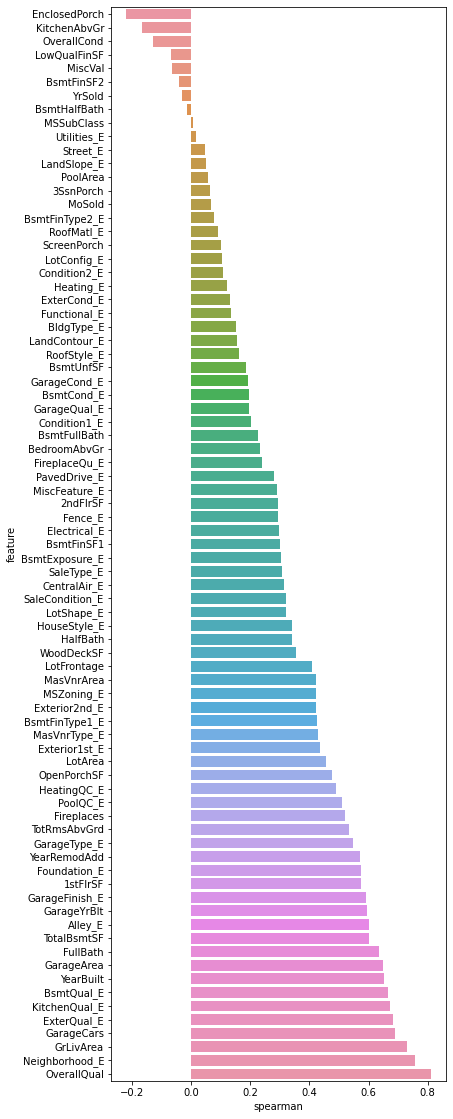

In [14]:
def spearman(frame, features):
    spr=pd.DataFrame()
    spr['feature']=features
    
    # f = quantitative와 encoding한 변수 합친것.
    ## SalePrice와 각 변수들간의 스피어만 상관관계를 구함.
    spr['spearman']=[frame[f].corr(frame['SalePrice'], 'spearman') for f in features]  
    spr=spr.sort_values('spearman')
    # 시각화
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature',x='spearman',orient='h')

features=quantitative+qual_encoded
spearman(train,features)

In [19]:
def spearman(frame, features):
    spr=pd.DataFrame()
    spr['feature']=features
    spr['spearman']=[frame[f].corr(frame['SalePrice'], 'spearman') for f in features]  
    spr=spr.sort_values('spearman')
    return spr
features=quantitative+qual_encoded
spearman(train,features)

,feature,spearman
29,EnclosedPorch,-0.218394
21,KitchenAbvGr,-0.164826
4,OverallCond,-0.129325
14,LowQualFinSF,-0.067719
33,MiscVal,-0.062727
9,BsmtFinSF2,-0.038806
35,YrSold,-0.029899
17,BsmtHalfBath,-0.012189
0,MSSubClass,0.007192
41,Utilities_E,0.016710


In [55]:
features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_E',
 'Street_E',
 'Alley_E',
 'LotShape_E',
 'LandContour_E',
 'Utilities_E',
 'LotConfig_E',
 'LandSlope_E',
 'Neighborhood_E',
 'Condition1_E',
 'Condition2_E',
 'BldgType_E',
 'HouseStyle_E',
 'RoofStyle_E',
 'RoofMatl_E',
 'Exterior1st_E',
 'Exterior2nd_E',
 'MasVnrType_E',
 'ExterQual_E',
 'ExterCond_E',
 'Foundation_E',
 'BsmtQual_E',
 'BsmtCond_E',
 'BsmtExposure_E',
 'BsmtFinType1_E',
 'BsmtFinType2_E',
 'Heating_E',
 'HeatingQC_E',
 'Centra

In [21]:
[train[f].corr(train['SalePrice'], 'spearman') for f in features]  

[0.007192252911733476,
 0.4090755179546496,
 0.4564605833912115,
 0.8098285862017292,
 -0.12932494660061317,
 0.6526815462850586,
 0.5711589780582343,
 0.42130949932884704,
 0.30187120358009534,
 -0.03880613204589418,
 0.185196629420762,
 0.6027254448924096,
 0.5754078354212823,
 0.29359798822238187,
 -0.06771915407896568,
 0.7313095834659141,
 0.22512486719612368,
 -0.012188876310787316,
 0.6359570562496957,
 0.34300754918568294,
 0.23490671789027862,
 -0.1648257549850205,
 0.532585935116993,
 0.5192474498367013,
 0.5937883261958506,
 0.6907109670497434,
 0.6493785338868229,
 0.35380160795878884,
 0.47756066228252647,
 -0.2183936205521982,
 0.06544021620062833,
 0.1000697202012266,
 0.058452996689891755,
 -0.0627270024962966,
 0.06943224370457042,
 -0.029899134912615286,
 0.422231783658981,
 0.045814187076882375,
 0.6012063893691018,
 0.3211840424380341,
 0.15442303068162044,
 0.016709609503697546,
 0.10502918707054075,
 0.05031026015605547,
 0.7557789170655118,
 0.2028772523414905,
 

### 히트맵
1. 양적변수와 SalePrice의 상관관계
2. 질적변수와 SalePrice의 상관관계
3. 양적변수와 질적변수의 상관관계

**결과해석**
> * 주차장은 집과 비슷한 년도에 지어진것으로 보인다.
> * 주차장 면적은 차의 대수와 강하게 상관성이 있다
> * Neighborhood는 여러 변수들과 상관관계가 있어보인다. 이것은 비슷한 지역의 집들이 비슷한 특징을 띈다는 것을 말한다.
> * 주택의종류는 kitchen above grade square feet과 음의 상관성을 띈다.

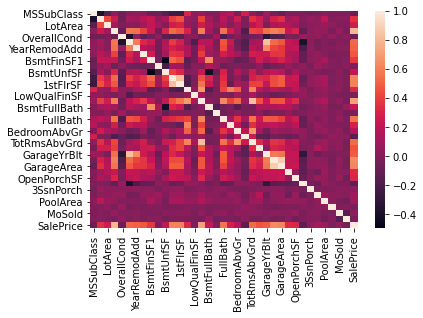

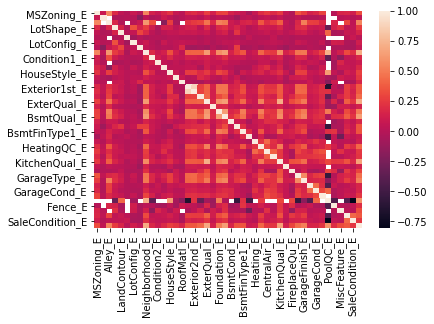

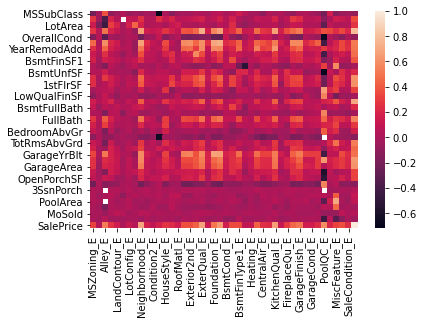

In [77]:
plt.figure(1)
# SalePrice와 '양적변수'간의 상관관계
corr=train[quantitative + ['SalePrice']].corr()    # +["SalePrice"]로 SalePrice값도 같이 불러오기
sns.heatmap(corr)

plt.figure(2)
# SalePrice와 (인코딩한) '질적변수'간의 상관관계
corr=train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

plt.figure(3)
# 양적변수와 (인코딩한) 질적변수간의 상관관계
corr=pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'],
                 columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1,q2]=train[q1].corr(train[q2])
sns.heatmap(corr);

**(상세)질적변수와 양적변수간의 상관관계 구하는법**
* np.zeros() 로 0으로 채운 행렬을 만든 다음, index는 양적변수명, column명은 질적변수명으로 채우고
* 양적변수와 질적변수 변수명을 for문으로 돌면서 corr변수의 값을 채움
    * train데이터에서 변수별 상관계수값

In [75]:
corr=pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'],
                 columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1,q2]=train[q1].corr(train[q2])
print(corr)

               MSZoning_E  Street_E   Alley_E  LotShape_E  LandContour_E  \
MSSubClass      -0.211535 -0.024969  0.369373   -0.103700      -0.027856   
LotFrontage      0.271431 -0.040886 -0.379265    0.191410       0.052988   
LotArea          0.140859 -0.197131 -0.437644    0.305505       0.183715   
OverallQual      0.269302  0.058823  0.492329    0.191561       0.105468   
OverallCond     -0.146350  0.042848 -0.305298   -0.023305      -0.042437   
YearBuilt        0.461917  0.021137  0.594158    0.218452       0.135145   
YearRemodAdd     0.241138  0.065465  0.439574    0.173964       0.094433   
MasVnrArea       0.128510  0.017326  0.241763    0.086173       0.030035   
BsmtFinSF1       0.170059 -0.015643  0.163181    0.127360       0.081854   
BsmtFinSF2       0.035922 -0.038487 -0.165316    0.065843       0.001652   
BsmtUnfSF        0.046960  0.035229  0.148981    0.014477       0.000150   
TotalBsmtSF      0.237309  0.005068  0.286589    0.171202       0.085858   
1stFlrSF    

--------------------------------------------------------------------------------
# Pairplots
* 각 독립변수들과 sale price 간의 관계를 보는데 pariplot도 유용하게 사용된다.
    * 여기서 이를통해 알수있는것은, 각 독립변수가 종속변수와 선형관계인지 비선형관계인지를 파악할수있음.

#### 그래프 해석 
> * 라쏘에 의해 선택되지 않을 많은 비선형 변수들이 보인다.
> * YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E  와같은 변수들(그래프상으로 삐죽삐죽한 형태)은 2차항을 추가해서 회귀에 적용하려면 이득일 것이다.
    * 또 다른한편, 이것은 오버피팅을 유발할수도 있다.

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

/Users/suhyun/anaconda3/envs/suhyun2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:


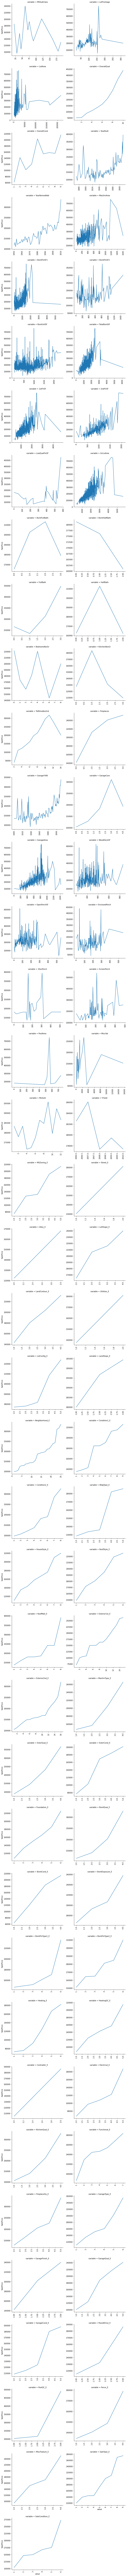

In [102]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
# size아니고, height로 바껴서 수정함.
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5) # col=변수에 해당하는 컬럼지정.
g = g.map(pairplot, "value", "SalePrice")

In [93]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0


In [86]:
f=pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
f

,SalePrice,variable,value
0,208500,MSSubClass,60.0
1,181500,MSSubClass,20.0
2,223500,MSSubClass,60.0
3,140000,MSSubClass,70.0
4,250000,MSSubClass,60.0
...,...,...,...
115335,175000,SaleCondition_E,5.0
115336,210000,SaleCondition_E,5.0
115337,266500,SaleCondition_E,5.0
115338,142125,SaleCondition_E,5.0


In [90]:
pd.DataFrame({'time':f['value'], 'val':f['SalePrice']})

,time,val
0,60.0,208500
1,20.0,181500
2,60.0,223500
3,70.0,140000
4,60.0,250000
...,...,...
115335,5.0,175000
115336,5.0,210000
115337,5.0,266500
115338,5.0,142125


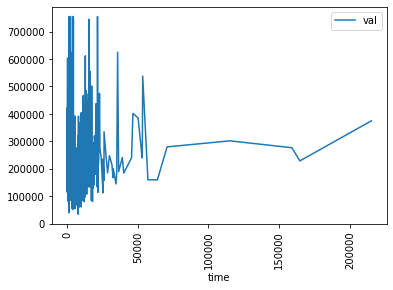

In [92]:
pariplot(f['value'],f['SalePrice'])

------------------------------------------------------------------------------------
# Price Segments
* SalePrice가 변함에 따라서 상관관계가 달라질 수 있음.

#### 그래프 해석
* 가격에 따라 집을 두 그룹으로 나누었다. cheap, expensive
* 그리고 양적변수들의 평균값을 비교했다
* 비싼집은 수영장이 있고, overall qual과 condition이 더 좋고, MasVnrArea의 중요도가 올라간다.

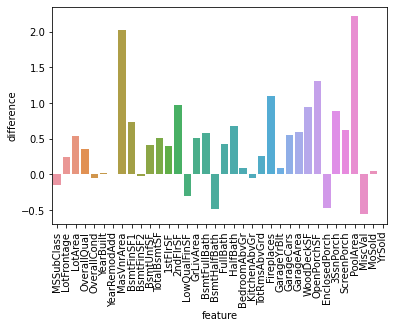

In [114]:
# 여기서 features는 양적변수
features=quantitative

standard=train[train['SalePrice'] < 200000]
pricey=train[train['SalePrice']>=200000]

diff=pd.DataFrame()
diff['feature']=features
# 결측치는 0으로 채우고, 집값이 비싼그룹에서의 각 컬럼별 평균값과, 집값이 싼 그룹에서의 컬럼별 평균값 차이를 
### 집값이 싼 그룹에서의 컬럼별 평균값 차이로 나눈다.
diff['difference']= [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean()) / (standard[f].fillna(0.).mean()) for f in features]

sns.barplot(data=diff, x='feature',y='difference')
x=plt.xticks(rotation=90)

In [111]:
pricey['LotArea'].fillna(0.).mean()

13932.891954022989

In [112]:
standard['LotArea'].fillna(0.).mean()

9067.083902439024

In [113]:
(pricey['LotArea'].fillna(0.).mean()-standard['LotArea'].fillna(0.).mean())/standard['LotArea'].fillna(0.).mean()

0.5366453099959816

----------------------------------------
# Clustering
 * PCA